In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpltools import special
import pandas as pd
import collections
from numpy import dot
from numpy.linalg import norm
import random
import seaborn as sns 

In [2]:
warandpeace = open('war-and-peace.txt')
wap = warandpeace.read()

In [24]:
symbols = np.genfromtxt('symbols.txt', dtype = 'str')

In [25]:
symbols = np.asarray(symbols)
symbols = np.insert(symbols, 1, " ")
symbollist = list(symbols)

In [7]:
Tmat = np.zeros((53, 53))
for i in range(0, 53):
    for j in range(0, 53):
        pair = symbols[i]+symbols[j]
        Tmat[i][j] = wap.lower().count(pair) + 1
    if np.sum(Tmat[i]) > 0:
        Tmat[i] = Tmat[i]/np.sum(Tmat[i])

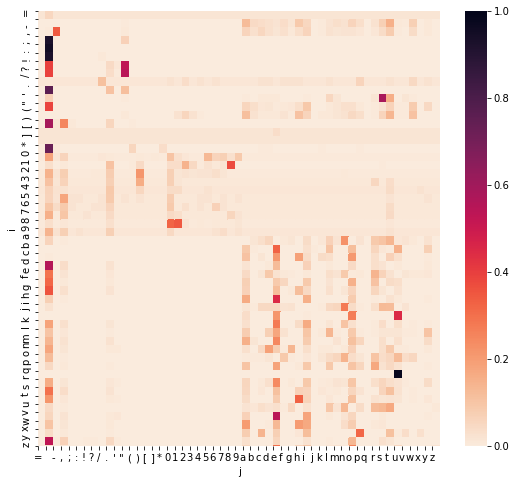

In [64]:
plt.figure(figsize=(9,8))
ax = sns.heatmap(Tmat, cmap="rocket_r", vmin=0, vmax=1)
ax.set_xlabel('j')
ax.set_ylabel('i')
ax.set_xticks(np.arange(0, 53))
ax.set_yticks(np.arange(0, 53))
ax.set_xticklabels(symbols)
ax.set_yticklabels(symbols)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Tmat.T)
idx = np.argmin(np.abs(eigenvalues - 1))
w = np.real(eigenvectors[:, idx]).T
stationary = w/np.sum(w)

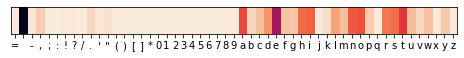

In [123]:
plt.rcParams["figure.figsize"] = 5, 2

x = range(53)
y = stationary

plt.figure(figsize = (8, 0.5))
ax = plt.gca()

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap = "rocket_r", aspect = "auto", extent = extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax.set_xticks(range(53))
ax.set_xticklabels(symbols)
plt.show()

In [27]:
message = open('message.txt')
mess = message.read()
messar = list(mess)
occurrences = collections.Counter(messar)
occurrences = occurrences.most_common()

In [28]:
stat_sorted = np.sort(stationary)[::-1]

In [29]:
symbdict = dict()
for i in range(0, len(occurrences)):
    symbind = int(np.where(stationary == stat_sorted[i])[0])
    symbdict[occurrences[i][0]] = symbollist[symbind]

In [30]:
print(symbdict)

{'p': ' ', '?': 'e', 'w': 't', 's': 'a', '[': 'o', ':': 'n', 'g': 'i', ']': 'h', '!': 's', ';': 'r', '-': 'd', '1': 'l', 'x': 'u', 'n': 'm', '2': 'c', 'l': 'w', 'm': 'f', 'r': 'g', '/': 'y', '.': 'p', 'u': ',', 'z': 'b', ',': '.', '5': 'v', ' ': 'k', '9': '"', '6': "'", '7': '-', 'v': 'x', 'c': '!', '0': '?', '4': 'j'}


In [31]:
for i in range(0, 53):
    if symbols[i] not in symbdict:
        for j in range(0, 53):
            if symbols[j] not in symbdict.values():
                symbdict[symbols[i]] = symbols[j]
                break
            

In [32]:
print(symbdict)

{'p': ' ', '?': 'e', 'w': 't', 's': 'a', '[': 'o', ':': 'n', 'g': 'i', ']': 'h', '!': 's', ';': 'r', '-': 'd', '1': 'l', 'x': 'u', 'n': 'm', '2': 'c', 'l': 'w', 'm': 'f', 'r': 'g', '/': 'y', '.': 'p', 'u': ',', 'z': 'b', ',': '.', '5': 'v', ' ': 'k', '9': '"', '6': "'", '7': '-', 'v': 'x', 'c': '!', '0': '?', '4': 'j', '=': '=', "'": ';', '"': ':', '(': '/', ')': '(', '*': ')', '3': '[', '8': ']', 'a': '*', 'b': '0', 'd': '1', 'e': '2', 'f': '3', 'h': '4', 'i': '5', 'j': '6', 'k': '7', 'o': '8', 'q': '9', 't': 'q', 'y': 'z'}


In [33]:
def charswap(symbdict2):
    sigmas, s = random.choice(list(symbdict2.items()))
    sigmasprime, sprime = random.choice(list(symbdict2.items()))
    if(sigmas == sigmasprime):
        charswap(symbdict2)
    else:
        symbdict2[sigmas] = sprime
        symbdict2[sigmasprime] = s
    
    return symbdict2

In [34]:
def likelihood(transmatr, mess, symbdict1, symbols1):
    n = len(mess)
    logl = 0
    
    for i in range(n-1):
        chari = symbdict1.get(mess[i])
        chari = int(np.where(symbols1 == chari)[0])
        charj = symbdict1.get(mess[i+1])
        charj = int(np.where(symbols1 == charj)[0])
        logl = logl + np.log(transmatr[chari][charj])
    
    return logl

In [35]:
def MH_Kernel(symbdict, transmatr, symbols, mess):
    switchdict = charswap(symbdict.copy())
    like1 = likelihood(np.copy(transmatr), mess, symbdict.copy(), np.copy(symbols))
    like2 = likelihood(np.copy(transmatr), mess, switchdict.copy(), np.copy(symbols))
    A = np.exp(like2-like1)
    if A > 1:
        A = 1
    if random.random() < A:
        symbdict = switchdict
        swap = 1
    else:
        swap = 0
        
    return symbdict, swap

In [36]:
def decode(mess, symbdict):
    translated = ""
    for symb in mess.lower():
        if symbdict.get(symb) != None:
            translated = translated+(symbdict.get(symb))
    print(translated[0:59])
    return translated

In [37]:
totswaps = 0
for i in range(0, 10000):
    symbdict, swap = MH_Kernel(symbdict, Tmat, symbols, mess)
    totswaps = totswaps+swap
    if i % 100 == 0:
        print("Iteration: ", i)
        decode(mess, symbdict)
    
decodedmessage=decode(mess,symbdict)

Iteration:  0
on lw whunges tnm lhse furnestpre wetsi lw ytades gtfe le i
Iteration:  100
on fw whunaes tnm fhse durnestpre wetsg fw ytiles atde fe g
Iteration:  200
on hw waunfes tnm hase durnestpre wetsg hw ytiles ftde he g
Iteration:  300
or wh haurfen irm wane dusrenipse heing wh yitlen fide we g
Iteration:  400
ar wh hourfen irm wone dusrenipse heing wh yitlen fide we g
Iteration:  500
ar wh houryen ird wone musrenipse heing wh fitlen yime we g
Iteration:  600
ar wl louryen ird wone musrenipse leing wl fithen yime we g
Iteration:  700
ar bl louryen ird bone mugrenipge leins bl fithen yime be s
Iteration:  800
ar bl louryen ird bone mugrenipge leins bl fithen yime be s
Iteration:  900
ar bl louryen ird bone mugrenipge leins bl fithen yime be s
Iteration:  1000
ar bl lourken ird bone mugrenipge leins bl fithen kime be s
Iteration:  1100
ar bl lourken ird bone mufrenipfe leins bl githen kime be s
Iteration:  1200
ar bl lourken ird bone mufrenipfe leins bl githen kime be s
Iteration: 

In [22]:
decodedmessage = decode(mess, symbdict)
print(decodedmessage)

in my younger and more vulnerable years my father gave me s
in my younger and more vulnerable years my father gave me some advice that i've been turning over in my mind ever since. "whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven't had the advantages that you've had." he didn't say any more but we've always been unusually communicative in a reserved way, and i understood that he meant a great deal more than that. in consequence i'm inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores. the abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college i was unjustly accused of being a politician, because i was privy to the secret griefs of wild, unknown men. most of the confidences were unsought--frequently i have feigned sleep, preoccupation, or a hostile le